<a href="https://colab.research.google.com/github/GurungVinivesh/HR_analyst/blob/main/HR_Analyst_1_sep_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resource Machine Learning Project: Predictinig employee turnover**

## ***Objective:***<br>
To predict whether an employee will leave the company (attrition) based on various features such as age, job satisfaction, salary, etc.<br>


The steps that should be followed in this analysis are:

*   Data collection and preparation
*   Load and explore data
*   Data processing
*   Split the data into training and testing sets
*   Build and train the model
*   Feature importance
*   Model deployment




### **Step 1:** Data collection and preparation<br>
For this project, we'll use a sample dataset. You can use an HR analytics dataset from sources like Kaggle or any other dataset you have.

### **Step 2:** Load and explore data <br>
Now we will import the necessary libraries and dataset.

In [1]:
#Importing pandas for data manipulation
import pandas as pd

#importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Loading the dataset
data = pd.read_csv('/content/HRDataset_v14.csv')

In [28]:
#Dispalying some of the data so that we will know it's features
data.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [29]:
#Now checking for any null values present in the dataset
data.isnull().sum()

,0
Employee_Name,0
EmpID,0
MarriedID,0
MaritalStatusID,0
GenderID,0
EmpStatusID,0
DeptID,0
PerfScoreID,0
FromDiversityJobFairID,0
Salary,0


In [30]:
#To check the summary of statistics
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [31]:
data.dtypes

,0
Employee_Name,object
EmpID,int64
MarriedID,int64
MaritalStatusID,int64
GenderID,int64
EmpStatusID,int64
DeptID,int64
PerfScoreID,int64
FromDiversityJobFairID,int64
Salary,int64


### **Step 3:** Data processing <br>
Processing the data for analysis

In [102]:
#Encode categorical values
data['GenderID'] = data['GenderID'].map({'Female': 0, 'Male': 1})
data['MaritalStatusID'] = data['MaritalStatusID'].map({'Married': 0, 'Single': 1})


In [103]:
#One-hot encoding for department and position
data = pd.get_dummies(data, columns=['Position'], drop_first=True)


In [104]:
#Now Dropping the irrelevant columns
data = data.drop(['EmpID', 'DateofHire', 'DateofTermination', 'Termd', 'State',
                  'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
                  'HispanicLatino', 'RaceDesc', 'EmploymentStatus', 'Employee_Name'], axis=1)

In [105]:
# Display updated data structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MarriedID                              311 non-null    int64  
 1   MaritalStatusID                        0 non-null      float64
 2   GenderID                               0 non-null      float64
 3   EmpStatusID                            311 non-null    int64  
 4   DeptID                                 311 non-null    int64  
 5   PerfScoreID                            311 non-null    int64  
 6   FromDiversityJobFairID                 311 non-null    int64  
 7   Salary                                 311 non-null    int64  
 8   PositionID                             311 non-null    int64  
 9   TermReason                             311 non-null    object 
 10  Department                             311 non-null    object 
 11  Manage

In [109]:
data.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'PositionID',
       'TermReason', 'Department', 'ManagerName', 'ManagerID',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'Position_Administrative Assistant',
       'Position_Area Sales Manager', 'Position_BI Developer',
       'Position_BI Director', 'Position_CIO', 'Position_Data Analyst',
       'Position_Data Analyst ', 'Position_Data Architect',
       'Position_Database Administrator', 'Position_Director of Operations',
       'Position_Director of Sales', 'Position_Enterprise Architect',
       'Position_IT Director', 'Position_IT Manager - DB',
       'Position_IT Manager - Infra', 'Position_IT Manager - Support',
       'Position_IT Support', 'Position_Network Engineer',
       'Position_President & CEO', '

In [111]:
import numpy as np
#Now performing an exploratory data analysis

# Convert 'N/A-StillEmployed' to NaN
data.replace('N/A-StillEmployed', np.nan, inplace=True)
# Convert 'career change' to NaN
data.replace('career change', np.nan, inplace=True)
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
# Calculate correlation matrix
correlation_matrix = numerical_data.corr()
# Display correlation matrix
print(correlation_matrix)



                        MarriedID  MaritalStatusID  GenderID  EmpStatusID  \
MarriedID                1.000000              NaN       NaN     0.085619   
MaritalStatusID               NaN              NaN       NaN          NaN   
GenderID                      NaN              NaN       NaN          NaN   
EmpStatusID              0.085619              NaN       NaN     1.000000   
DeptID                  -0.119932              NaN       NaN     0.088711   
PerfScoreID             -0.058362              NaN       NaN    -0.071208   
FromDiversityJobFairID  -0.012708              NaN       NaN     0.189025   
Salary                   0.026165              NaN       NaN    -0.110912   
PositionID              -0.027334              NaN       NaN     0.221221   
ManagerID               -0.094002              NaN       NaN     0.234222   
EngagementSurvey        -0.091178              NaN       NaN     0.024305   
EmpSatisfaction         -0.126191              NaN       NaN     0.010553   

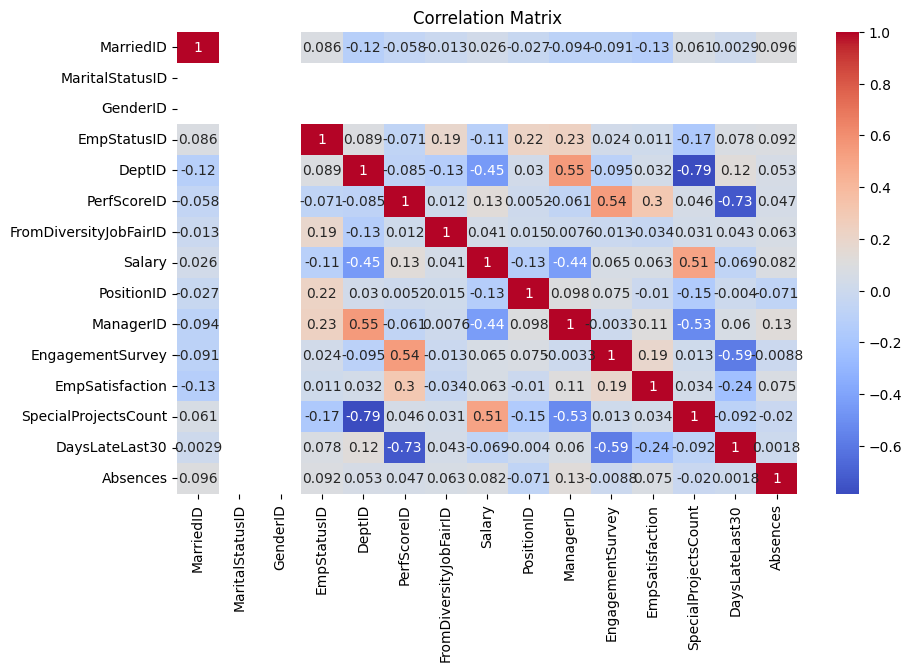

In [113]:
#Creating a correlation heatmap
plt.figure(figsize=(10,6))
# Remove non-numeric columns before calculating correlation
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

### **Step 4:** Split the data into training and testing sets <br>
Apply data spliting, training and testing methods to get a more thorough report.


In [125]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 845.1 kB/s eta 0:00:00


In [128]:
from category_encoders import OneHotEncoder # import the OneHotEncoder
X = data.drop('EmpSatisfaction', axis=1)  # Features
y = data['EmpSatisfaction']  # Target variable


In [137]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If X_train is a pandas DataFrame, use this to replace NaN with 'missing':
X_train.fillna('missing', inplace=True)
X_test.fillna('missing', inplace=True)

<ipython-input-137-b2369a27658f>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_train.fillna('missing', inplace=True)
<ipython-input-137-b2369a27658f>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_test.fillna('missing', inplace=True)


### **Step 5:** Build and train the model <br>
We will use the random Forest classifier for this project

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Initializing the model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [140]:
#Checking for null values
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Step 6:** Model Evaluation <br>
Evaluate the model, and get the accuracy of it and make a classifiaction report of it.

In [143]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Now you can fit the model and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [144]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.35


In [145]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.34      0.61      0.44        18
           4       0.29      0.17      0.22        23
           5       0.41      0.33      0.37        21

    accuracy                           0.35        63
   macro avg       0.26      0.28      0.26        63
weighted avg       0.34      0.35      0.33        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0  0  0  1]
 [ 0 11  5  2]
 [ 0 12  4  7]
 [ 0  9  5  7]]


### **Step 7:** Feature Importance <br>
Get the importance feature, as to what factor is the most important for the employees.

In [150]:
# Get the indices of the features sorted by importance
selected_features_indices = np.argsort(model.feature_importances_)[::-1]

# Ensure that the indices are within the valid range of columns in X
selected_features_indices = [i for i in selected_features_indices if i < X.shape[1]]

# Extract the names of the selected features from the original feature list
selected_feature_names = X.columns[selected_features_indices]

# Create the DataFrame using the selected feature names and their importances
feature_importances = pd.DataFrame({'Feature': selected_feature_names, 'Importance': model.feature_importances_[selected_features_indices]})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

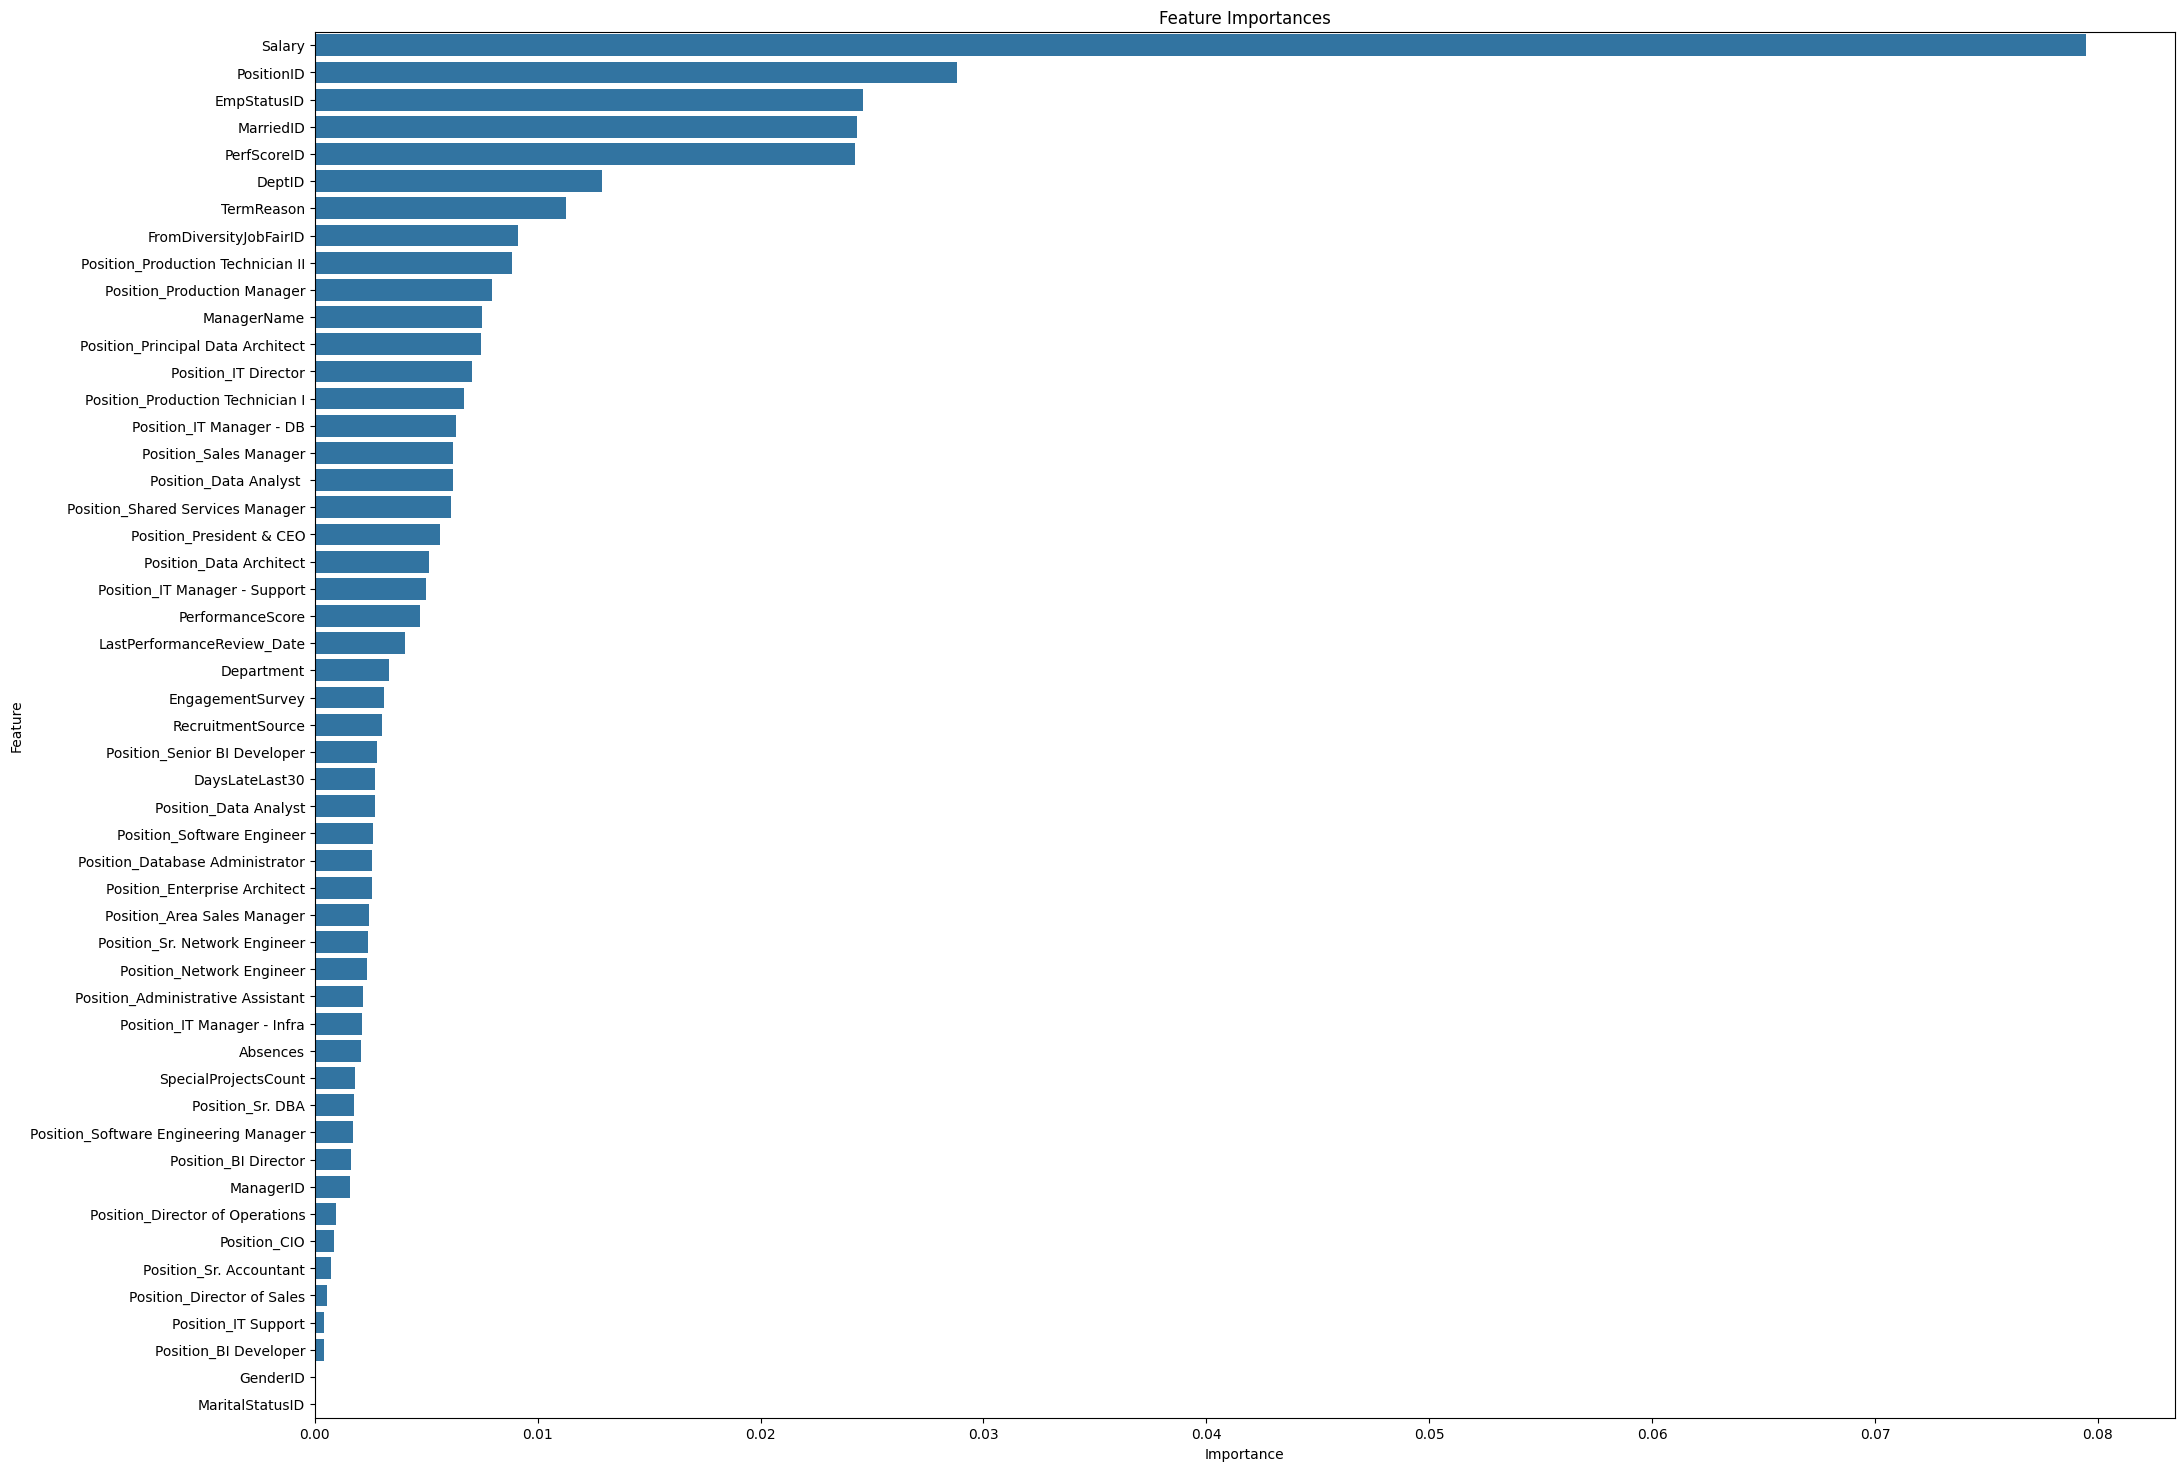

In [157]:
# Plot feature importances
plt.figure(figsize=(24, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# **Conclusion report**

As we can see the in the final model that the "Salary" is the feature that affects the attrition of the employees. <br>

The higher the salary of the employee the more they are likely to stay at the company.<br>

As the importance to salary is the largest in every scale.

*Hence*, as the report says the employees having the least salary is more likely to leave the company. <br>
To nullify this, We can negotiate with the employees about their salary.